# LetsGrowMore

## Task 1: Prediction using unsupervised Machine Learning

#### This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

## Intern: Ishaan Thareja

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Reading the data

data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


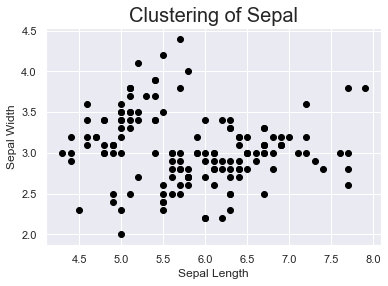

In [4]:
# Sepal scatter plot
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color='black')
plt.title('Clustering of Sepal', fontsize=20)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

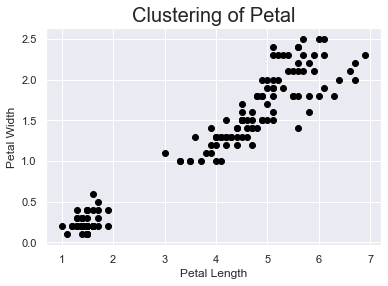

In [5]:
# Petal scatter plot
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], color='black')
plt.title('Clustering of Petal', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

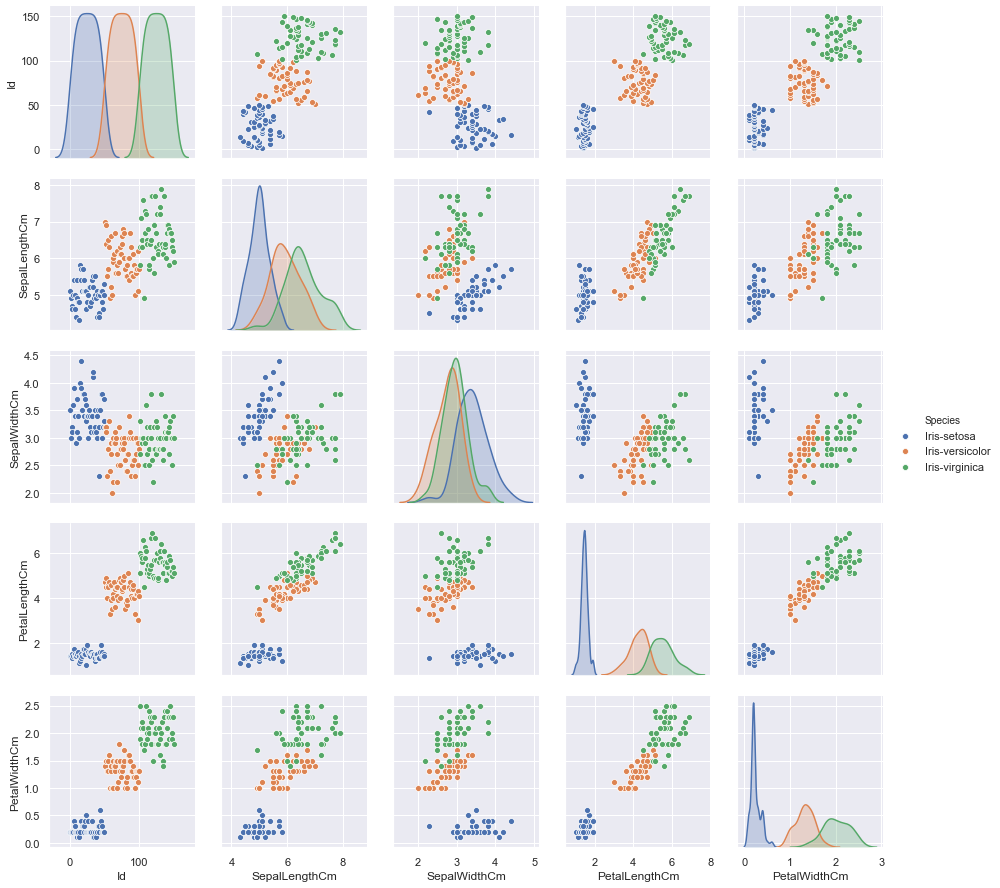

In [6]:
sns.pairplot(data, hue='Species')
plt.show()

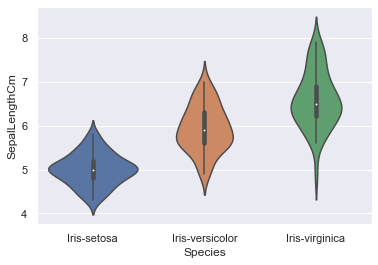

In [7]:
sns.violinplot(x=data['Species'], y=data['SepalLengthCm'])
plt.show()

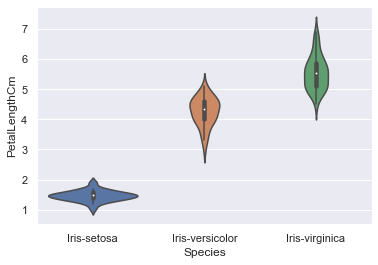

In [8]:
sns.violinplot(x=data['Species'], y=data['PetalLengthCm'])
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [10]:
x = data.iloc[:,1:5]

In [11]:
# Checking the WCSS to find the optimum number of clusters

wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 39.251830892636775,
 34.517658942364825,
 29.881402210510913,
 27.96283572567783]

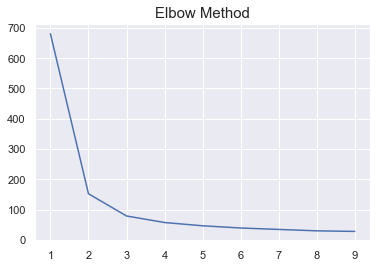

In [12]:
# Plotting the graph to see WCSS graphically

plt.plot(range(1,10), wcss)
plt.title('Elbow Method', fontsize=15)
plt.show()

#### According to the above graph, we select the number of clusters as 3

In [13]:
kmeans = KMeans(3, random_state=1)

In [14]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [15]:
# Creating a summary table

cluster_table = data.iloc[:,1:6]
cluster_table['Cluster'] = kmeans.fit_predict(x)

In [16]:
cluster_table.tail(25)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
125,7.2,3.2,6.0,1.8,Iris-virginica,2
126,6.2,2.8,4.8,1.8,Iris-virginica,0
127,6.1,3.0,4.9,1.8,Iris-virginica,0
128,6.4,2.8,5.6,2.1,Iris-virginica,2
129,7.2,3.0,5.8,1.6,Iris-virginica,2
130,7.4,2.8,6.1,1.9,Iris-virginica,2
131,7.9,3.8,6.4,2.0,Iris-virginica,2
132,6.4,2.8,5.6,2.2,Iris-virginica,2
133,6.3,2.8,5.1,1.5,Iris-virginica,0
134,6.1,2.6,5.6,1.4,Iris-virginica,2


### Plotting the Sepal length and width graphs before and after clustering


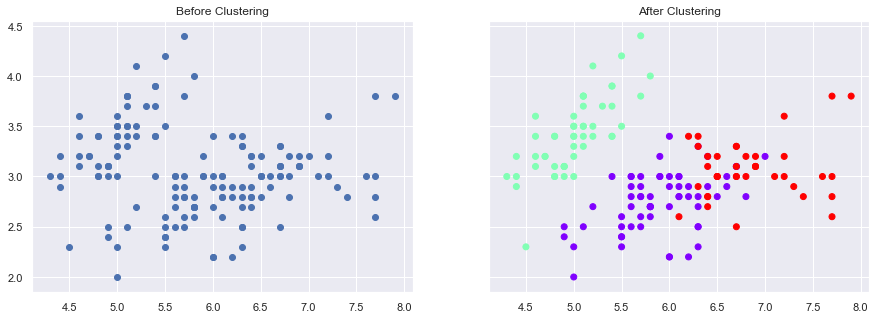

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
    
ax1.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
ax1.set_title('Before Clustering')

ax2.scatter(cluster_table['SepalLengthCm'], data['SepalWidthCm'], c=cluster_table['Cluster'], cmap='rainbow')
ax2.set_title('After Clustering')

plt.show()

### Plotting the Petal length and width graphs before and after clustering

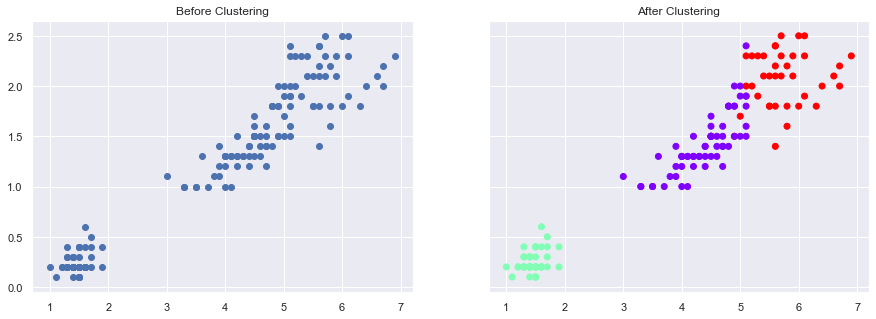

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
    
ax1.scatter(data['PetalLengthCm'], data['PetalWidthCm'])
ax1.set_title('Before Clustering')

ax2.scatter(cluster_table['PetalLengthCm'], data['PetalWidthCm'], c=cluster_table['Cluster'], cmap='rainbow')
ax2.set_title('After Clustering')

plt.show()

## Thank You!